# Deep Learning Fundamentals - LU08-A Exercise
 
## 8.1 Transfer Learning

Tranfer learning refers to a process where a model trained on one problem is used in some way on a second related problem. In deep learning, transfer learning is a technique where the neural network is first trained on a problem similar to the problem that is being solved. One or more layers from the trained model are then used in a new model trained on the problem of interest. It has the benefit of decreasing the training time for a neural network model and can result in lower generalization error. 

A large number of models have been developed for image classification and demonstrated on the annual ImageNet Large Scale Visual Recognition (ILSVR) Challenge. These models can be used as the basis for transfer learning in computer vision applications.

Some reasons of usage includes:
<ul>
    <li>Useful Learned Features: models have learnt to detect generic features from photographs as trained on > 1,000,000 images for 1,000 categories</li>    
    <li>Easily Accessible: model weights are provided as free downladable files and many libraries provided convenient APIs to download and use the model directly</li>    
</ul>

Three popular models are:
<ul>
    <li>VGG (e.g. VGG16 and VGG19)</li>
    <li>GoogLe Net (e.g InceptionV3)</li>
    <li>Residual Network (e.g ResNet50)</li>
</ul>
They are widely used because of their performance. Keras provides access to a number of such models. We shall use the VGG16 for our LU07 Lab Exercise

### 8.1.1 Using the base Pre-trained Network (VGG16) without additional training
VGG16 is a CNN architecture which was used to win the ILSVR competition in 2014. What the competition aims to achieve is to train a model that can correctly classify an input image into 1,000 separate object categories.

The VGG network architecture is characterized by its simplicity of using only 3x3 convolution layers stacked on top of each other in increasing depth. It using Max-Pooling to reduce the volume size and completes with a 2 fully-connected layer, each with 4,096 nodes, followed by a softmax classifier.

VGG16 and VGG19 refers to the numbers of weighted layers in the network. 

#### 8.1.2 Loading the VGG16 Pre-trained model

The first time a pre-trained model is loaded, Keras will download the required model weights. By default, the model expects color input images to be rescaled to the size of 224x224, minimum is 48x48. Lets load the model using Keras.

Note: For more details on Keras implementation of the pre-trained model, you can refer to https://keras.io/api/applications/

In [1]:
from keras.applications import vgg16

# importing VGG16 from keras with pre-trained weights that is trained on imagenet
# include_top > whether to include the 3 fully-connected layers at the top of the network.
# weights > to use the weights from pre-training on Imagenet
vggModel = vgg16.VGG16(include_top=True, weights='imagenet')

553476096/553467096 [==============================] - 5s 0us/step


We can now take a look at the summary of the VGG model. 

In [2]:
vggModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### 8.1.3 Using 1 image from CIFAR-10 for VGG16 prediction
For this part of the exercise, instead of loading an existing image, we will load the CIFAR-10 image and randomly choose one from the dataset to test out the prediction using the VGG16 pre-trained model.

In [3]:
from keras.datasets import cifar10

# Load the cifar10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)
print('train_labels shape:', train_labels.shape)
print('test_labels shape:', test_labels.shape)

170508288/170498071 [==============================] - 14s 0us/step
train_images shape: (50000, 32, 32, 3)
test_images shape: (10000, 32, 32, 3)
train_labels shape: (50000, 1)
test_labels shape: (10000, 1)


The following perform a random selection on the CIFAR-10 dataset and plot the selected image using imshow. As show in the LU06 lab exercise, there are 10 classes of labels in CIFAR-10 as follows:

airplane : 0  
automobile : 1  
bird : 2  
cat : 3  
deer : 4  
dog : 5  
frog : 6  
horse : 7  
ship : 8  
truck : 9 

To display the actual naming of the category, a mapping of the label class <b>categories</b> has been created.

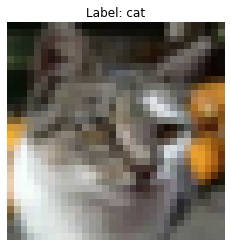

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

# To create a mapping of the label class to allow display of the description instead of a number
categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Randomly select an image from the CIFAR data set 
imgSize = len(train_images)
selected = random.randint(0, imgSize)
img = train_images[selected]

plt.imshow(img)
plt.axis('off')
plt.title('Label: {}'.format(categories[train_labels[selected][0]]))
plt.show()

#### 8.1.4 Preparing the image for prediction into VGG16
Now that we have selected a random image that we want the model to predict, the image will need to be preprocess to the required format to be fit into the model. We will use the Python Imaging Library (PIL) to help us create an image memory from an object exporting the array interface.


In [5]:
import numpy as np
from PIL import Image
from keras.preprocessing import image

# Create an image memory object
im = Image.fromarray(img)

# 224x224 is the default image size required by VGG16
im = im.resize((224, 224))
x = np.array(im)

# Add a fourth dimension (since Keras expects a list of images)
x = np.expand_dims(x, axis=0)

# Normalize the input image's pixel values to the range used when training the neural network
# This step is required if you are using the base VGG16 model without further training
x = vgg16.preprocess_input(x)

#### 8.1.5 Predict the image using VGG16
Make prediction on the image that was chosen from the CIFAR random

In [6]:
# Run the image through the deep neural network to make a prediction
predictions = vggModel.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = vgg16.decode_predictions(predictions)

for imagenet_id, name, likelihood in predicted_classes[0]:
    print("Prediction: {} - {:2f}%".format(name, likelihood*100))
    

49152/35363 [=========================================] - 0s 0us/step
Prediction: fox_squirrel - 10.274965%
Prediction: Egyptian_cat - 8.839220%
Prediction: tiger_cat - 6.338888%
Prediction: tabby - 6.236654%
Prediction: revolver - 4.130206%


You can see that if we are to use the original VGG16 base layers to do a prediction, it will not be able to identify our dataset (the CIFAR dataset). This is because the VGG16 was not trained using this dataset. Therefore, it is necessary to further train it to identify our dataset. This is what Transfer Learning is about and we will see it in part 2 of LU07 lab

#### 8.1.6 Using an image from local directory to make the prediction 
The following is an example that will use an image from the local directory to make a prediction using the base VGG16 model. Similar to the earlier example, the prediction will not be accurate.

In [7]:
import os

## uncomment line 5 and modify accordingly to your folder if you are running on local computer
# Modify and run this if you are running jupyter on your local computer
#file_path = os.path.join('sample_dataset', "monkey_1.jpg")

## uncomment line 8 to line 11 and modify accordingly to your folder if you are running on Google Colab
from google.colab import drive
drive.mount('/content/drive')
colab_path = 'drive/My Drive/Colab Notebooks/SDAAI-C2349/LU08/sample_dataset/' # complete path in Google Drive as follows for file access
file_path = colab_path + "monkey_1.png"

Mounted at /content/drive


In [8]:
import cv2
from keras.preprocessing.image import img_to_array

# Load the image of a cat image in the same directory
image = cv2.imread(file_path)
image = image[..., [2,1,0]]

# Pre-process the image for classification
image = cv2.resize(image, (224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# Normalize the input image's pixel values to the range used when training the neural network
image = vgg16.preprocess_input(image)

# Run the image through the deep neural network to make a prediction
predictions = vggModel.predict(image)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = vgg16.decode_predictions(predictions)

for imagenet_id, name, likelihood in predicted_classes[0]:
    print("Prediction: {} - {:2f}%".format(name, likelihood*100))

Prediction: macaque - 54.267013%
Prediction: baboon - 31.106567%
Prediction: patas - 7.381795%
Prediction: langur - 4.366592%
Prediction: guenon - 0.797266%


#### 8.1.7 Print out the full class list

In [9]:
full_class_list = vgg16.decode_predictions(np.expand_dims(np.arange(1000), 0), top=1000)
full_class_list = [i[1] for i in full_class_list[0]]

In [10]:
print(full_class_list)

['toilet_tissue', 'ear', 'bolete', 'hen-of-the-woods', 'earthstar', 'stinkhorn', 'gyromitra', 'agaric', 'coral_fungus', 'buckeye', 'hip', 'acorn', 'corn', "yellow_lady's_slipper", 'daisy', 'rapeseed', 'scuba_diver', 'groom', 'ballplayer', 'volcano', 'valley', 'seashore', 'sandbar', 'promontory', 'lakeside', 'geyser', 'coral_reef', 'cliff', 'bubble', 'alp', 'eggnog', 'cup', 'espresso', 'red_wine', 'burrito', 'potpie', 'pizza', 'meat_loaf', 'dough', 'chocolate_sauce', 'carbonara', 'hay', 'pomegranate', 'custard_apple', 'jackfruit', 'banana', 'pineapple', 'fig', 'lemon', 'orange', 'strawberry', 'Granny_Smith', 'mushroom', 'cardoon', 'bell_pepper', 'artichoke', 'cucumber', 'butternut_squash', 'acorn_squash', 'spaghetti_squash', 'zucchini', 'cauliflower', 'broccoli', 'head_cabbage', 'mashed_potato', 'hotdog', 'cheeseburger', 'pretzel', 'bagel', 'French_loaf', 'ice_lolly', 'ice_cream', 'trifle', 'hot_pot', 'consomme', 'guacamole', 'plate', 'menu', 'book_jacket', 'traffic_light', 'street_sign